## Residual analysis on simulated ground motion

In [ ]:
# create surface data table with azimuth , and rjb, rrup and depi
import pandas as pd
import pyproj

import numpy as np
import importlib, GMfunc.find_surf_site
importlib.reload(GMfunc.find_surf_site)

from GMfunc.find_surf_site import get_intensity_table_vs30_baz

rootfolder = '/Users/DuoL/Documents/NSHM/'

# convert  # UTM projection
lla = pyproj.Proj(proj='latlong', ellps='WGS84', datum='WGS84')
myproj = pyproj.Proj(init='epsg:2193', datum='WGS84')

eveTable = pd.read_csv(rootfolder + '/Model_kinematic/GeoNetsummary/filesNew/'+ 'cats_subtable_sel.csv')

siteTable = pd.read_csv(rootfolder + 'Model_kinematic/siteTable_xy.csv')

evelist = []

for ieve, evename in enumerate(eveTable['Date'].astype(str)):
    
    modelname = evename[0:8]
    print(modelname)
    
    try:
        xdmfFilename='/Users/DuoL/Documents/NSHM/Model_kinematic/mesh4/newSTFD/m'+ modelname +'/stf1-GME-surface.xdmf'

        # event origin and location, matching the event Data first 8 digits

        eveTable1 = eveTable[eveTable['Date'].astype(str).str.contains(modelname)] 
        pubID = eveTable1['PublicID'].values

        # print(pubID)

        xss,yss = pyproj.transform(lla,myproj,eveTable1["Longitude"],eveTable1["Latitude"])

        origin=(xss,yss)

        print(origin)

        hypocenter = np.array([xss[0],yss[0],-eveTable1['CD'].values[0]*1e3])
        print(hypocenter.shape)

        df = get_intensity_table_vs30_baz(xdmfFilename, siteTable=siteTable, source_coords=hypocenter, origin=origin,station_col='sta',z_col='elev')

        # for surface output
        # df_all3 = df[df['r_epi'].between(9,60,inclusive='both')]
        # df_all = df_all3.iloc[::50,:]

        df.to_csv(rootfolder + '/NSHM_SRM_Model/Scripts/eventTable/eventTable-'+ modelname +'.csv')

        evelist.append(modelname)

    except:
        pass

    print('finish '+ modelname)


In [52]:
# df.to_csv(rootfolder + '/NSHM_SRM_Model/Scripts/residTable/eventTable'+ modelname +'.csv')


# df_all3 = df[df['r_epi (km)'].between(9,60,inclusive='both')]
# df_all = df_all3.iloc[::50,:]
# df_all.to_csv(rootfolder + '/NSHM_SRM_Model/Scripts/residTable/eventTable-'+ modelname +'.csv')
# print('finish '+modelname)

print('finish '+modelname)
print(df.keys())

print(evelist)
# print(siteTable.keys())


# to confirm r_jb = r_epi, while r_rup = sqrt(r_jp **2 + depth**2)
# print(df['r_jb (km)'],df['r_epi (km)'],df['r_rup (km)'])

finish 20240805
Index(['sta', 'PGA', 'PGV', 'pSA_1.0', 'pSA_3.0', 'r_epi', 'r_rup', 'r_jb',
       'az', 'baz', 'Vs30'],
      dtype='object')
['20120505', '20151022', '20171126', '20201230', '20210101', '20210410', '20220531', '20240805']


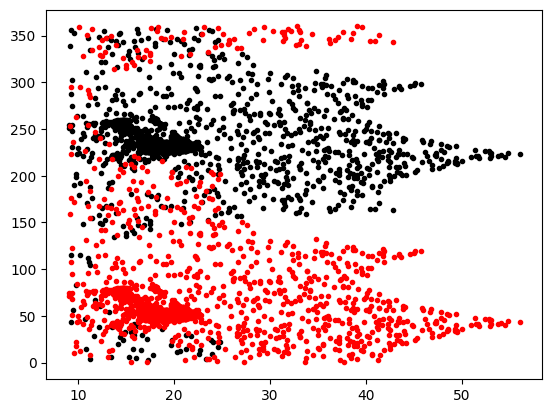

In [33]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df_all['r_epi (km)'],df_all['back_azimuth (deg)'],'.k')
plt.plot(df_all['r_epi (km)'],df_all['azimuth (deg)'],'.r')
# plt.xscale('log')
# plt.yscale('log')
plt.show()